# Benchmarks

In [1]:
# load import libraries
from sortingx import bubble, heap, insert, merge, quick, shell
methods = ['six.bubble', 'six.heap', 'six.insert', 'six.merge', 'six.quick', 'six.shell', 'list.sort()']

## Load Data

In [2]:
# about 7 methods, one of those is list.sort()
import csv
with open('./data.csv', 'r', encoding='UTF-8') as fout:
    read = csv.reader(fout, delimiter=' ', quotechar=' ', quoting=csv.QUOTE_MINIMAL)
    data = []
    for row in read:
        for index, value in enumerate(row):
            row[index] = eval(value)
        data.append(row)
testing = [data for _ in range(7)]

In [3]:
# times used to collect time, key use to select keywords.
times, key = [], lambda x: (x[2], x[3])

## Collect Time

In [ ]:

# decorator
import time
def count_time(func):
    def collection():
        start_time = time.time()
        func()
        over_time = time.time()
        total_time = over_time - start_time
        times.append(total_time)
        print("Time %s s" % total_time)
    return collection

In [19]:
@count_time
def main():
    # shell(testing[5], key, True)
    testing[6].sort(key=key, reverse=True)

In [20]:
main()

Time 0.005985736846923828 s


## Plot Time's Collection

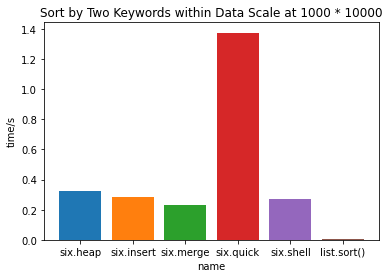

In [21]:
from draw import plot_bar
con = {
    'xlabel': 'name',
    'ylabel': 'time/s',
    'title': 'Sort by Two Keywords within Data Scale at 1000 * 10000'
}
ploting(methods, times, con, (1, 7))